# Regresion Lineal Simple desde Cero

Importar Librerias

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Cargar los datos

In [5]:
datos_csv = pd.read_csv("Advertising.csv",index_col=0)
datos_csv.head()

TV  Radio  Newspaper  Sales
1  230.1   37.8       69.2   22.1
2   44.5   39.3       45.1   10.4
3   17.2   45.9       69.3    9.3
4  151.5   41.3       58.5   18.5
5  180.8   10.8       58.4   12.9

In [6]:
datos_csv.tail()

TV  Radio  Newspaper  Sales
196   38.2    3.7       13.8    7.6
197   94.2    4.9        8.1    9.7
198  177.0    9.3        6.4   12.8
199  283.6   42.0       66.2   25.5
200  232.1    8.6        8.7   13.4

### Analisis Exploratorio de los datos

In [7]:
datos_csv.describe()

TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   14.022500
std     85.854236   14.846809   21.778621    5.217457
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   10.375000
50%    149.750000   22.900000   25.750000   12.900000
75%    218.825000   36.525000   45.100000   17.400000
max    296.400000   49.600000  114.000000   27.000000

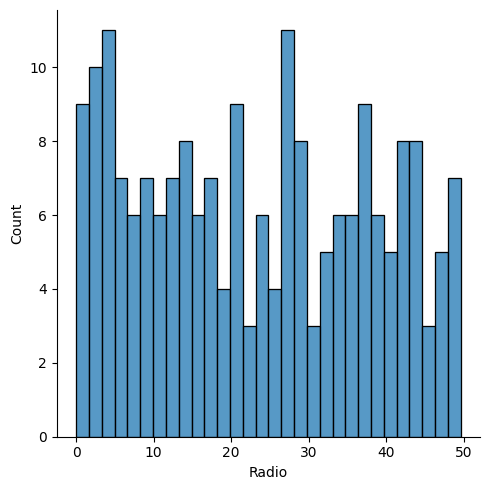

In [19]:
sns.displot(datos_csv['Radio'],bins=30)

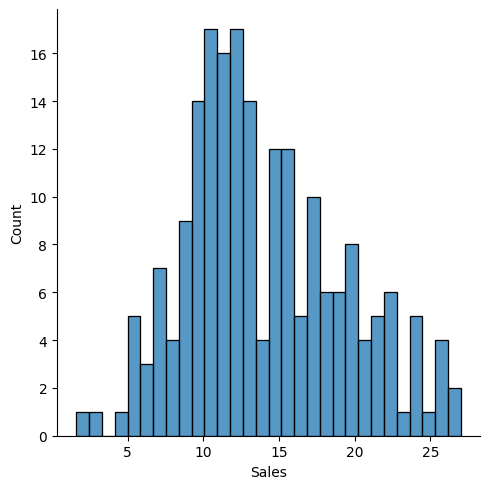

In [15]:
sns.displot(datos_csv['Sales'],bins=30)

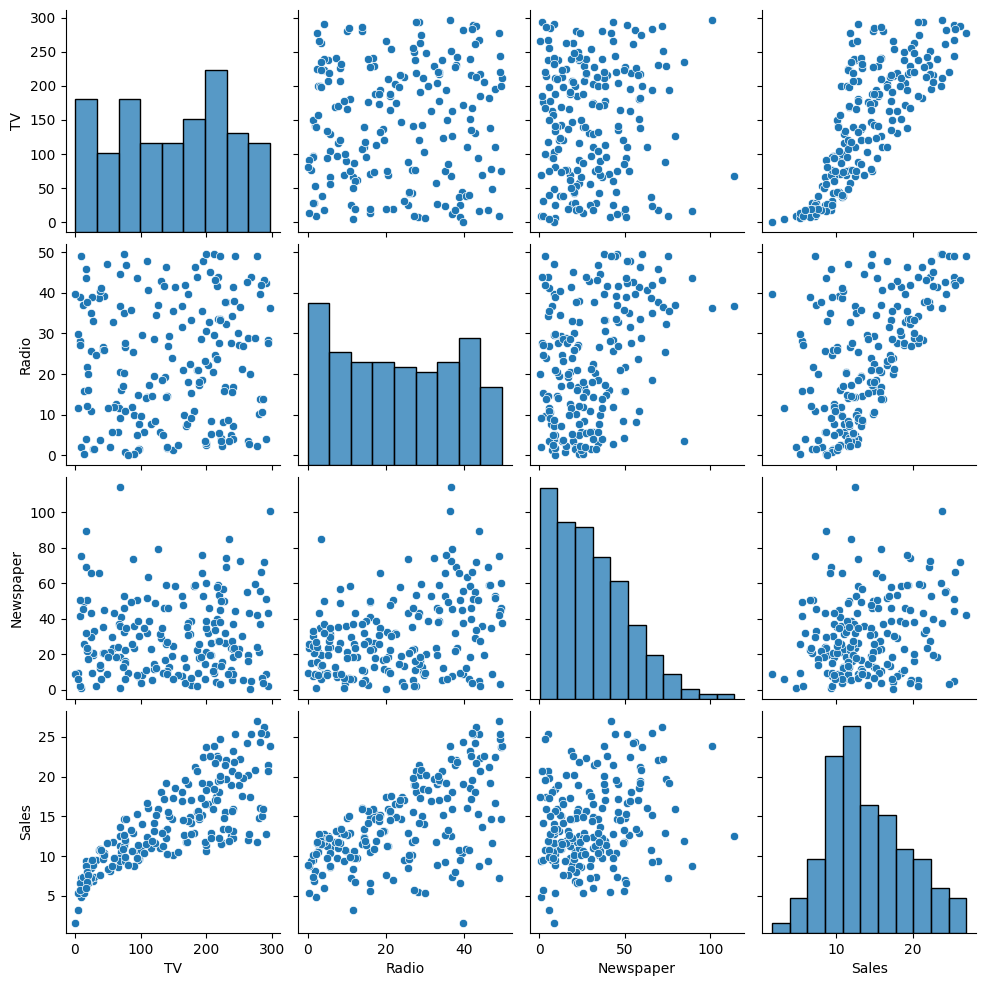

In [13]:
sns.pairplot(datos_csv)

<AxesSubplot:xlabel='Radio', ylabel='Sales'>

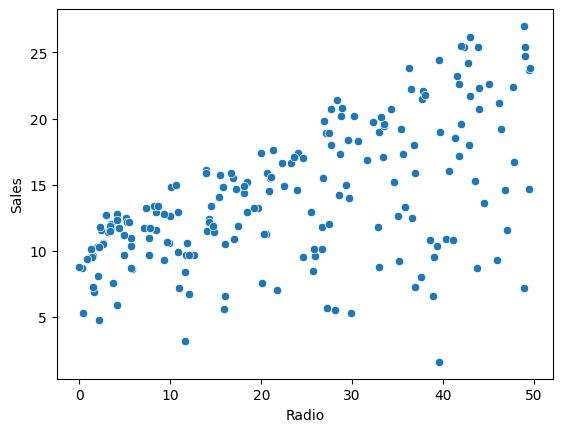

In [18]:
sns.scatterplot(x='Radio',y='Sales',data=datos_csv)

# Definir la variable de entrada (predictora) y la variable de salida

In [24]:
radio = datos_csv[['Radio']].to_numpy()
sales = datos_csv[['Sales']].to_numpy()

### Elaboracion del modelo de regresion lineal simple  

In [26]:
def prom(valores):
    return sum(valores)/float(len(valores))

def varianza(valores):
    prom_x = prom(valores)
    return sum([(x-prom_x)**2 for x in valores])

def covarianza(x,y):
    cov = 0.0
    prox = prom(x)
    proy = prom(y)
    for i in range(len(x)):
        cov = cov + (x[i]-prox)*(y[i]-proy)
    
    return cov

# Estimacion de Coeficientes

def coeficientes(x,y):
    b1 = covarianza(x,y)/varianza(x)
    b0 = prom(y) - b1*prom(x)
    return b0,b1

Aplicacion del modelo

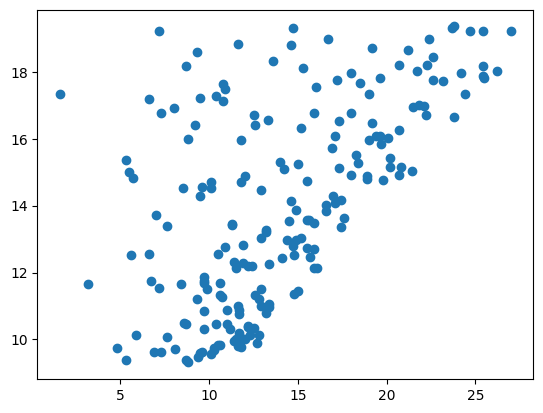

In [27]:
coef = coeficientes(radio,sales)
b0 = coef[0]
b1 = coef[1]
y_pred = b0 + b1*radio

plt.scatter(sales,y_pred)